In [63]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [85]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Convert data to DataFrame
data = pd.read_csv("Twitter_data.csv", encoding="ISO-8859-1")
data.columns=["target","ids","date","flag","user","text"]

data = data[:10000]
data['text']=data['text'].str.lower()
stopwords_list = stopwords.words('english')

data['text'].head()

0    is upset that he can't update his facebook by ...
1    @kenichan i dived many times for the ball. man...
2      my whole body feels itchy and like its on fire 
3    @nationwideclass no, it's not behaving at all....
4                        @kwesidei not the whole crew 
Name: text, dtype: object

In [86]:
STOPWORDS = set(stopwords_list)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))

In [87]:
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)
data['text']= data['text'].apply(lambda x: cleaning_email(x))
data['text'].head()

0    upset can't update facebook texting it... migh...
1      dived many times ball. managed save 50% rest...
2                     whole body feels itchy like fire
3      no, behaving all. i'm mad. here? can't see t...
4                                           whole crew
Name: text, dtype: object

In [88]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].head()

0    upset can't update facebook texting it... migh...
1      dived many times ball. managed save 50% rest...
2                     whole body feels itchy like fire
3      no, behaving all. i'm mad. here? can't see t...
4                                           whole crew
Name: text, dtype: object

In [89]:
import string
english_punctuations = string.punctuation
english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', english_punctuations)
    return text.translate(translator)
data['text'] = data['text'].apply(lambda text: cleaning_punctuations(text))
data['text'].head()

0    upset cant update facebook texting it might cr...
1      dived many times ball managed save 50 rest g...
2                     whole body feels itchy like fire
3           no behaving all im mad here cant see there
4                                           whole crew
Name: text, dtype: object

In [90]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].head()

0    upset cant update facebook texting it might cr...
1      dived many times ball managed save  rest go ...
2                     whole body feels itchy like fire
3           no behaving all im mad here cant see there
4                                           whole crew
Name: text, dtype: object

In [83]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
data['text'] = data['text'].apply(tokenizer.tokenize)
data['text'].head()

0    [upset, cant, update, facebook, texting, it, m...
1    [dived, many, times, ball, managed, save, rest...
2              [whole, body, feels, itchy, like, fire]
3    [no, behaving, all, im, mad, here, cant, see, ...
4                                        [whole, crew]
Name: text, dtype: object

In [91]:
from nltk.tokenize import word_tokenize
def preprocess(text):
    tokens = word_tokenize(text)  # Tokenization and lowercasing
    tokens = [token for token in tokens if token not in stopwords.words('english')]  # Remove stopwords
    tokens = [token for token in tokens if token not in string.punctuation]  # Remove punctuation
    return ' '.join(tokens)

# Apply preprocessing to tweets
preprocessed_data = data['text'].apply(lambda x: preprocess(x))

# Create Term-Document Matrix
vectorizer = CountVectorizer()
tdm = vectorizer.fit_transform(preprocessed_data)

# Convert to DataFrame for better visualization
tdm_df = pd.DataFrame(tdm.toarray(), columns=vectorizer.get_feature_names_out())
print(tdm_df)

      aa  aaa  aaaaaaaa  aaaaaaaaaah  aaaaaaaaah  aaaaah  aaaaand  aaaaargh  \
0      0    0         0            0           0       0        0         0   
1      0    0         0            0           0       0        0         0   
2      0    0         0            0           0       0        0         0   
3      0    0         0            0           0       0        0         0   
4      0    0         0            0           0       0        0         0   
...   ..  ...       ...          ...         ...     ...      ...       ...   
9995   0    0         0            0           0       0        0         0   
9996   0    0         0            0           0       0        0         0   
9997   0    0         0            0           0       0        0         0   
9998   0    0         0            0           0       0        0         0   
9999   0    0         0            0           0       0        0         0   

      aaaah  aaaargh  ...  ½o  ½s  ½sklov  ½ssen  ½

### In the below cell I am printing the TDM:

In [92]:
tdm_df.head()

,aa,aaa,aaaaaaaa,aaaaaaaaaah,aaaaaaaaah,aaaaah,aaaaand,aaaaargh,aaaah,aaaargh,...,½o,½s,½sklov,½ssen,½t,½tieï,½tobe,½u,½y,½ï
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

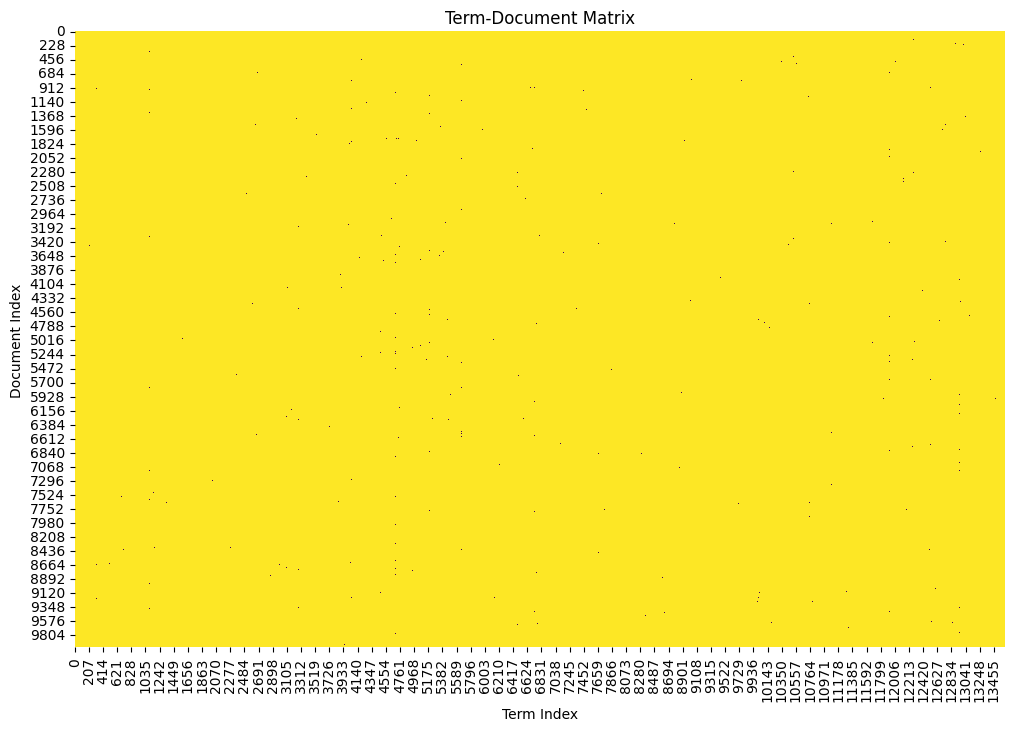

In [98]:
tdm_array = np.array(tdm_df)

plt.figure(figsize=(12, 8))
sns.heatmap(tdm_array==0, cmap='viridis', cbar=False)
plt.xlabel('Term Index')
plt.ylabel('Document Index')
plt.title('Term-Document Matrix')
plt.show()